<a href="https://www.kaggle.com/code/muradpitafi/mobile-price-classification?scriptVersionId=160299704" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [5]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

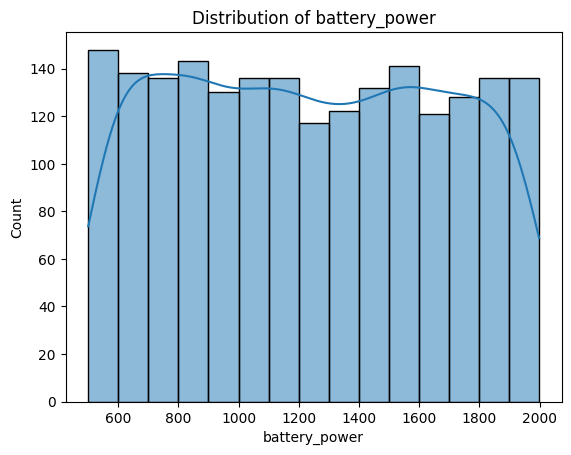

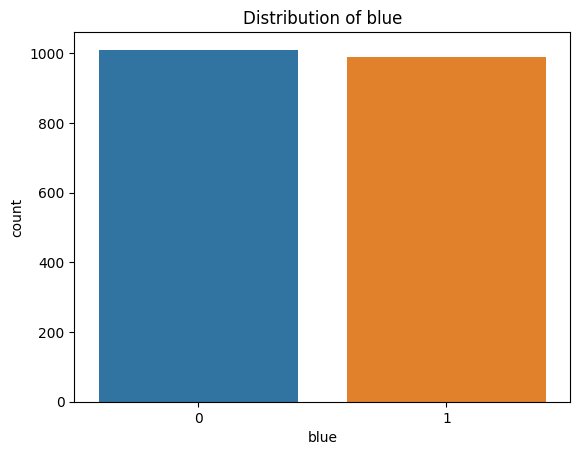

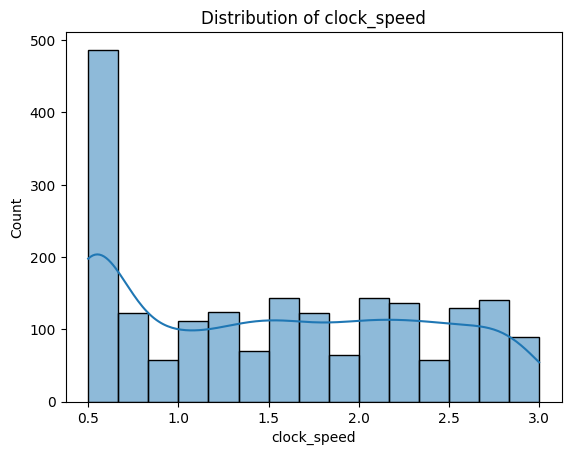

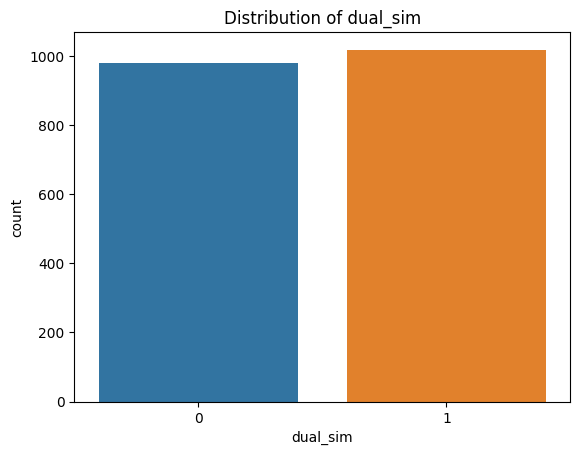

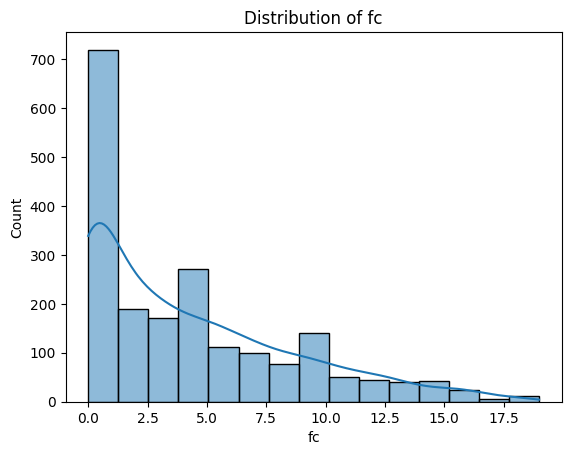

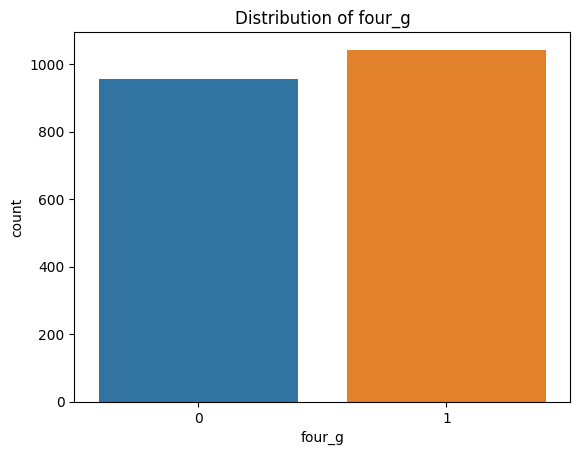

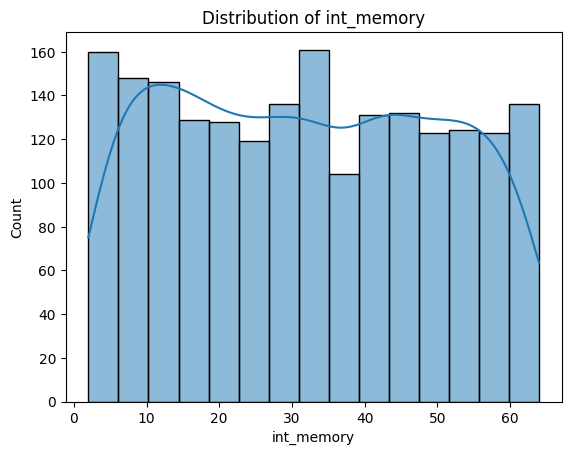

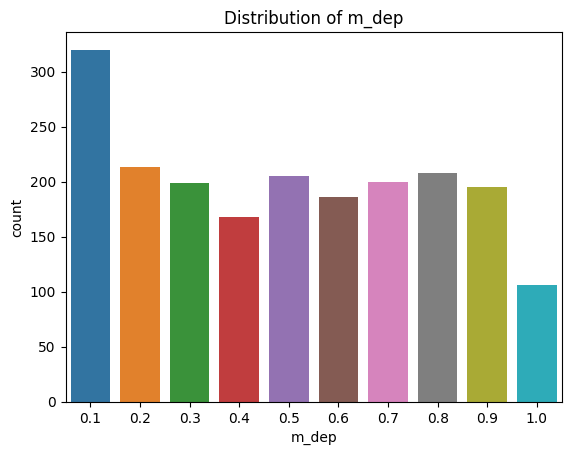

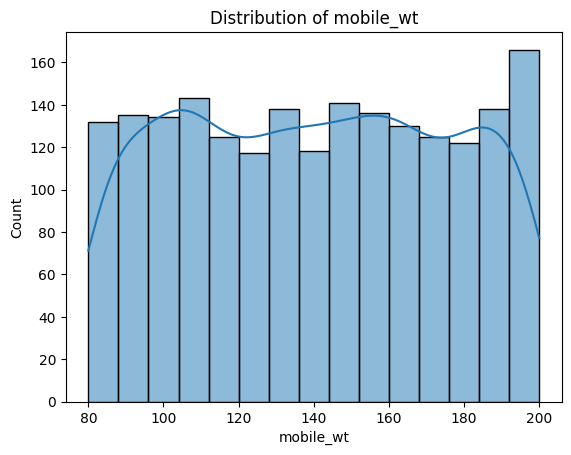

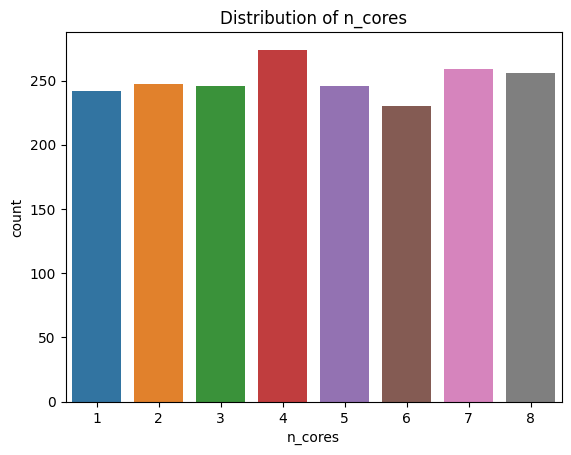

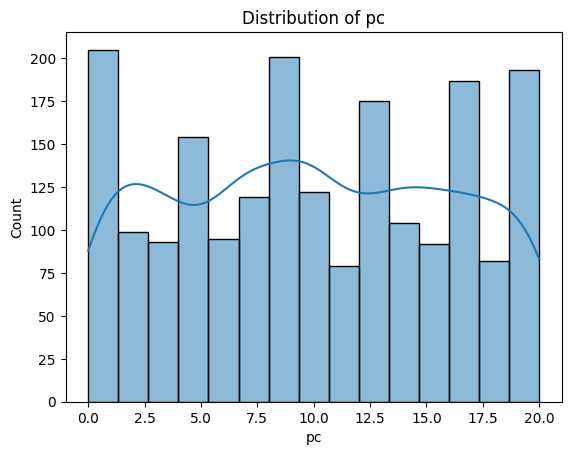

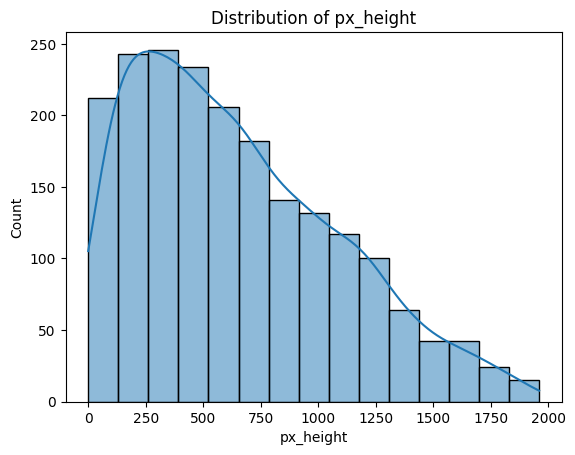

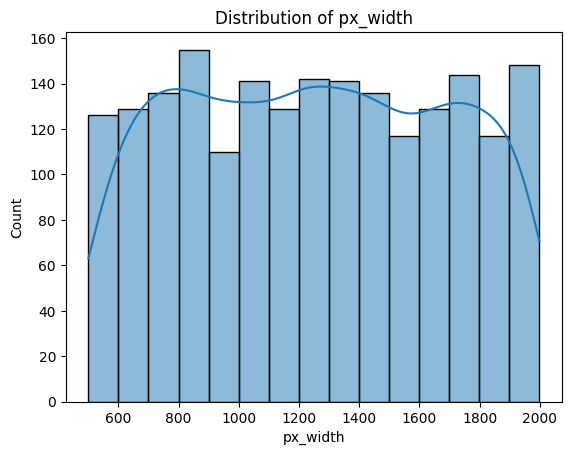

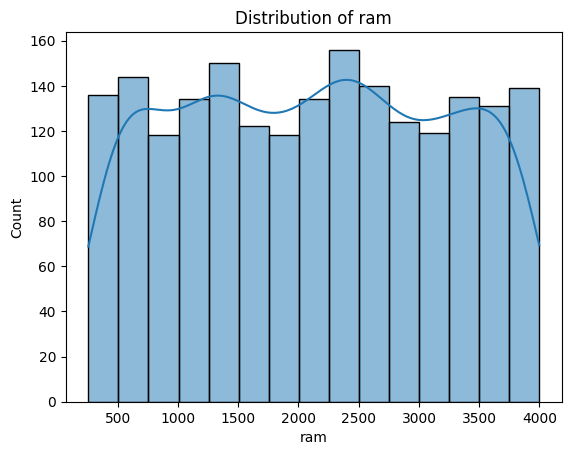

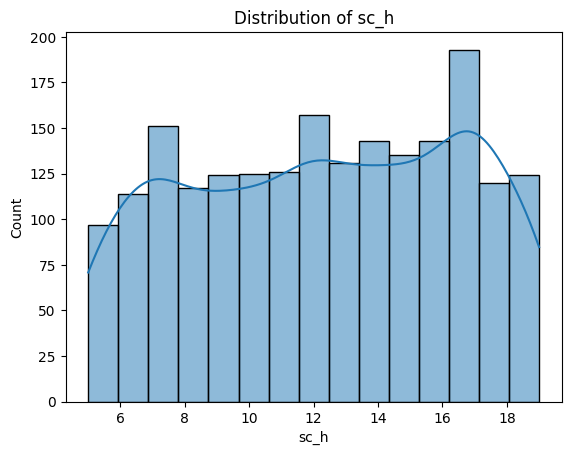

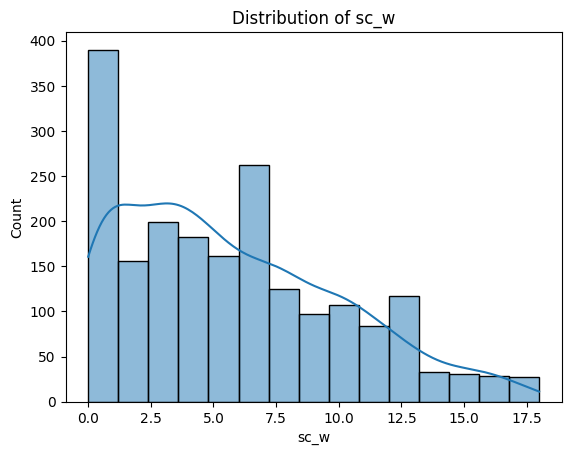

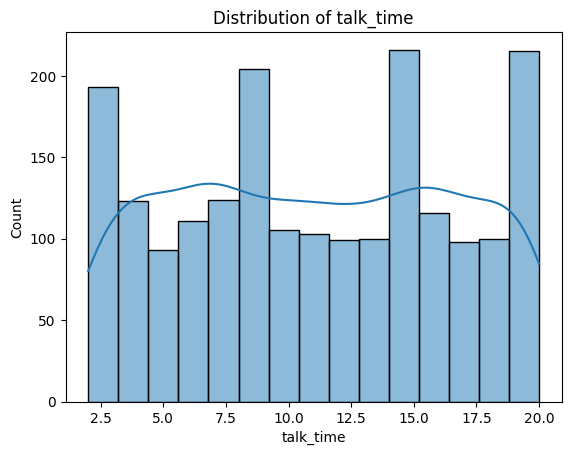

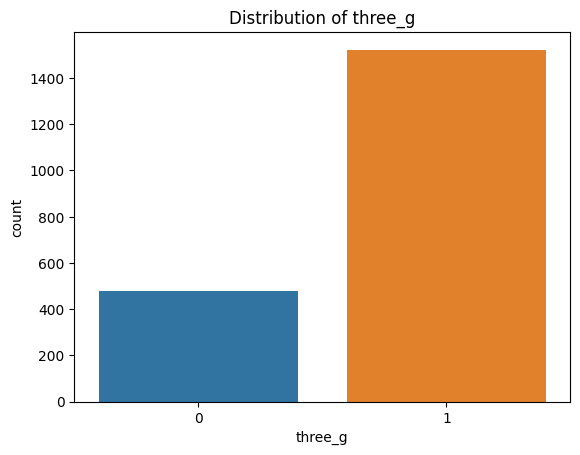

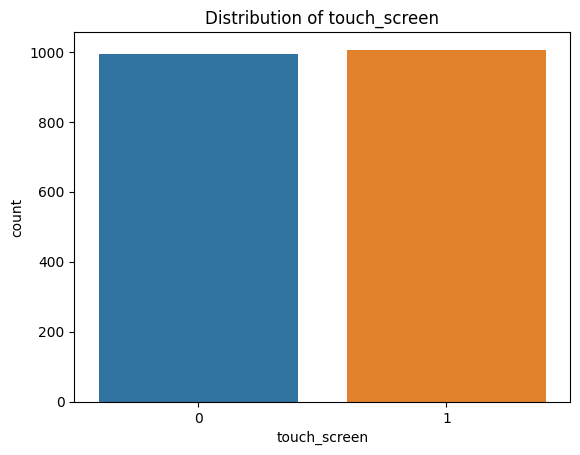

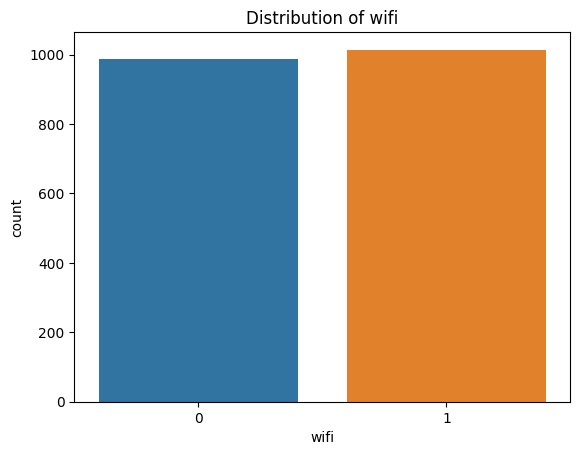

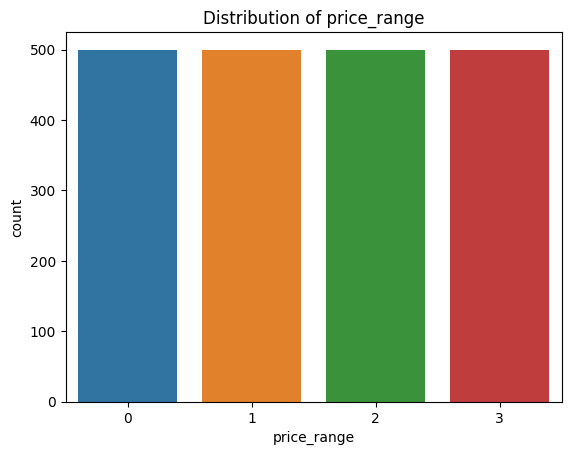

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in train.columns:
    if train[i].nunique() <= 10:
        plt.title(f'Distribution of {i}')
        sns.countplot(x = i, data = train)
        plt.show()
    else:
        plt.title(f'Distribution of {i}')
        sns.histplot(x = i , data = train , kde = True, bins = 15)
        plt.show()
    

In [7]:
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
scaler = StandardScaler()
scale = train.drop(['price_range'],axis = 1 )
for i in scale.columns:
    train[i] = scaler.fit_transform(train[[i]])

In [8]:
from sklearn.model_selection import train_test_split
x = train.drop(['price_range'], axis = 1)
y = train['price_range']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [10]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred = rfc.predict(xtest)
print("accuracy : ", rfc.score(xtest,ytest))

accuracy :  0.885


In [11]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print("accuracy : ", lr.score(xtest,ytest))

accuracy :  0.9775
